In [1]:
import pandas as pd
import numpy as np
import datetime
import os as os
import matplotlib.pyplot as plt

# Set so jupyter displays all columns
pd.set_option('display.max_columns', False)


In [2]:
os.chdir('../data/interim')

In [3]:
os.listdir()

['.gitkeep', 'joined data post-markdowns.csv', 'joined data pre-markdowns.csv']

In [4]:
df1 = pd.read_csv('joined data pre-markdowns.csv')
df2 = pd.read_csv('joined data post-markdowns.csv')

In [5]:
df3 = df1.drop(['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'], axis=1)

In [6]:
s1d1 = df3.loc[df3['Store'] == 1].loc[df3['Dept']==1]

In [7]:
s1d1.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
0,1,1,2010-01-10,20094.19,False,71.89,2.603,211.671989,7.838,A,151315
2935,1,1,2010-02-04,57258.43,False,62.27,2.719,210.820450,7.808,A,151315
5884,1,1,2010-02-07,16333.14,False,80.91,2.669,211.223533,7.787,A,151315
8801,1,1,2010-02-19,41595.55,False,39.93,2.514,211.289143,8.106,A,151315
11778,1,1,2010-02-26,19403.54,False,46.63,2.561,211.319643,8.106,A,151315


In [8]:
s1d1 = s1d1.drop(['Store', 'Dept', 'Type', 'Size'], axis=1)

In [9]:
s1d1.set_index('Date', inplace=True)

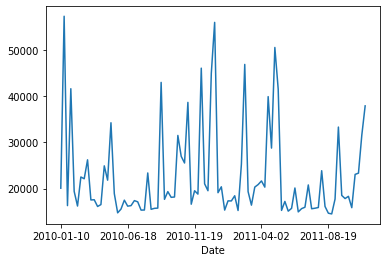

In [10]:
s1d1['Weekly_Sales'].plot()
plt.show()

In [11]:
df4 = df3.groupby(['Store', 'Date'])[['Weekly_Sales']].sum().sort_index()

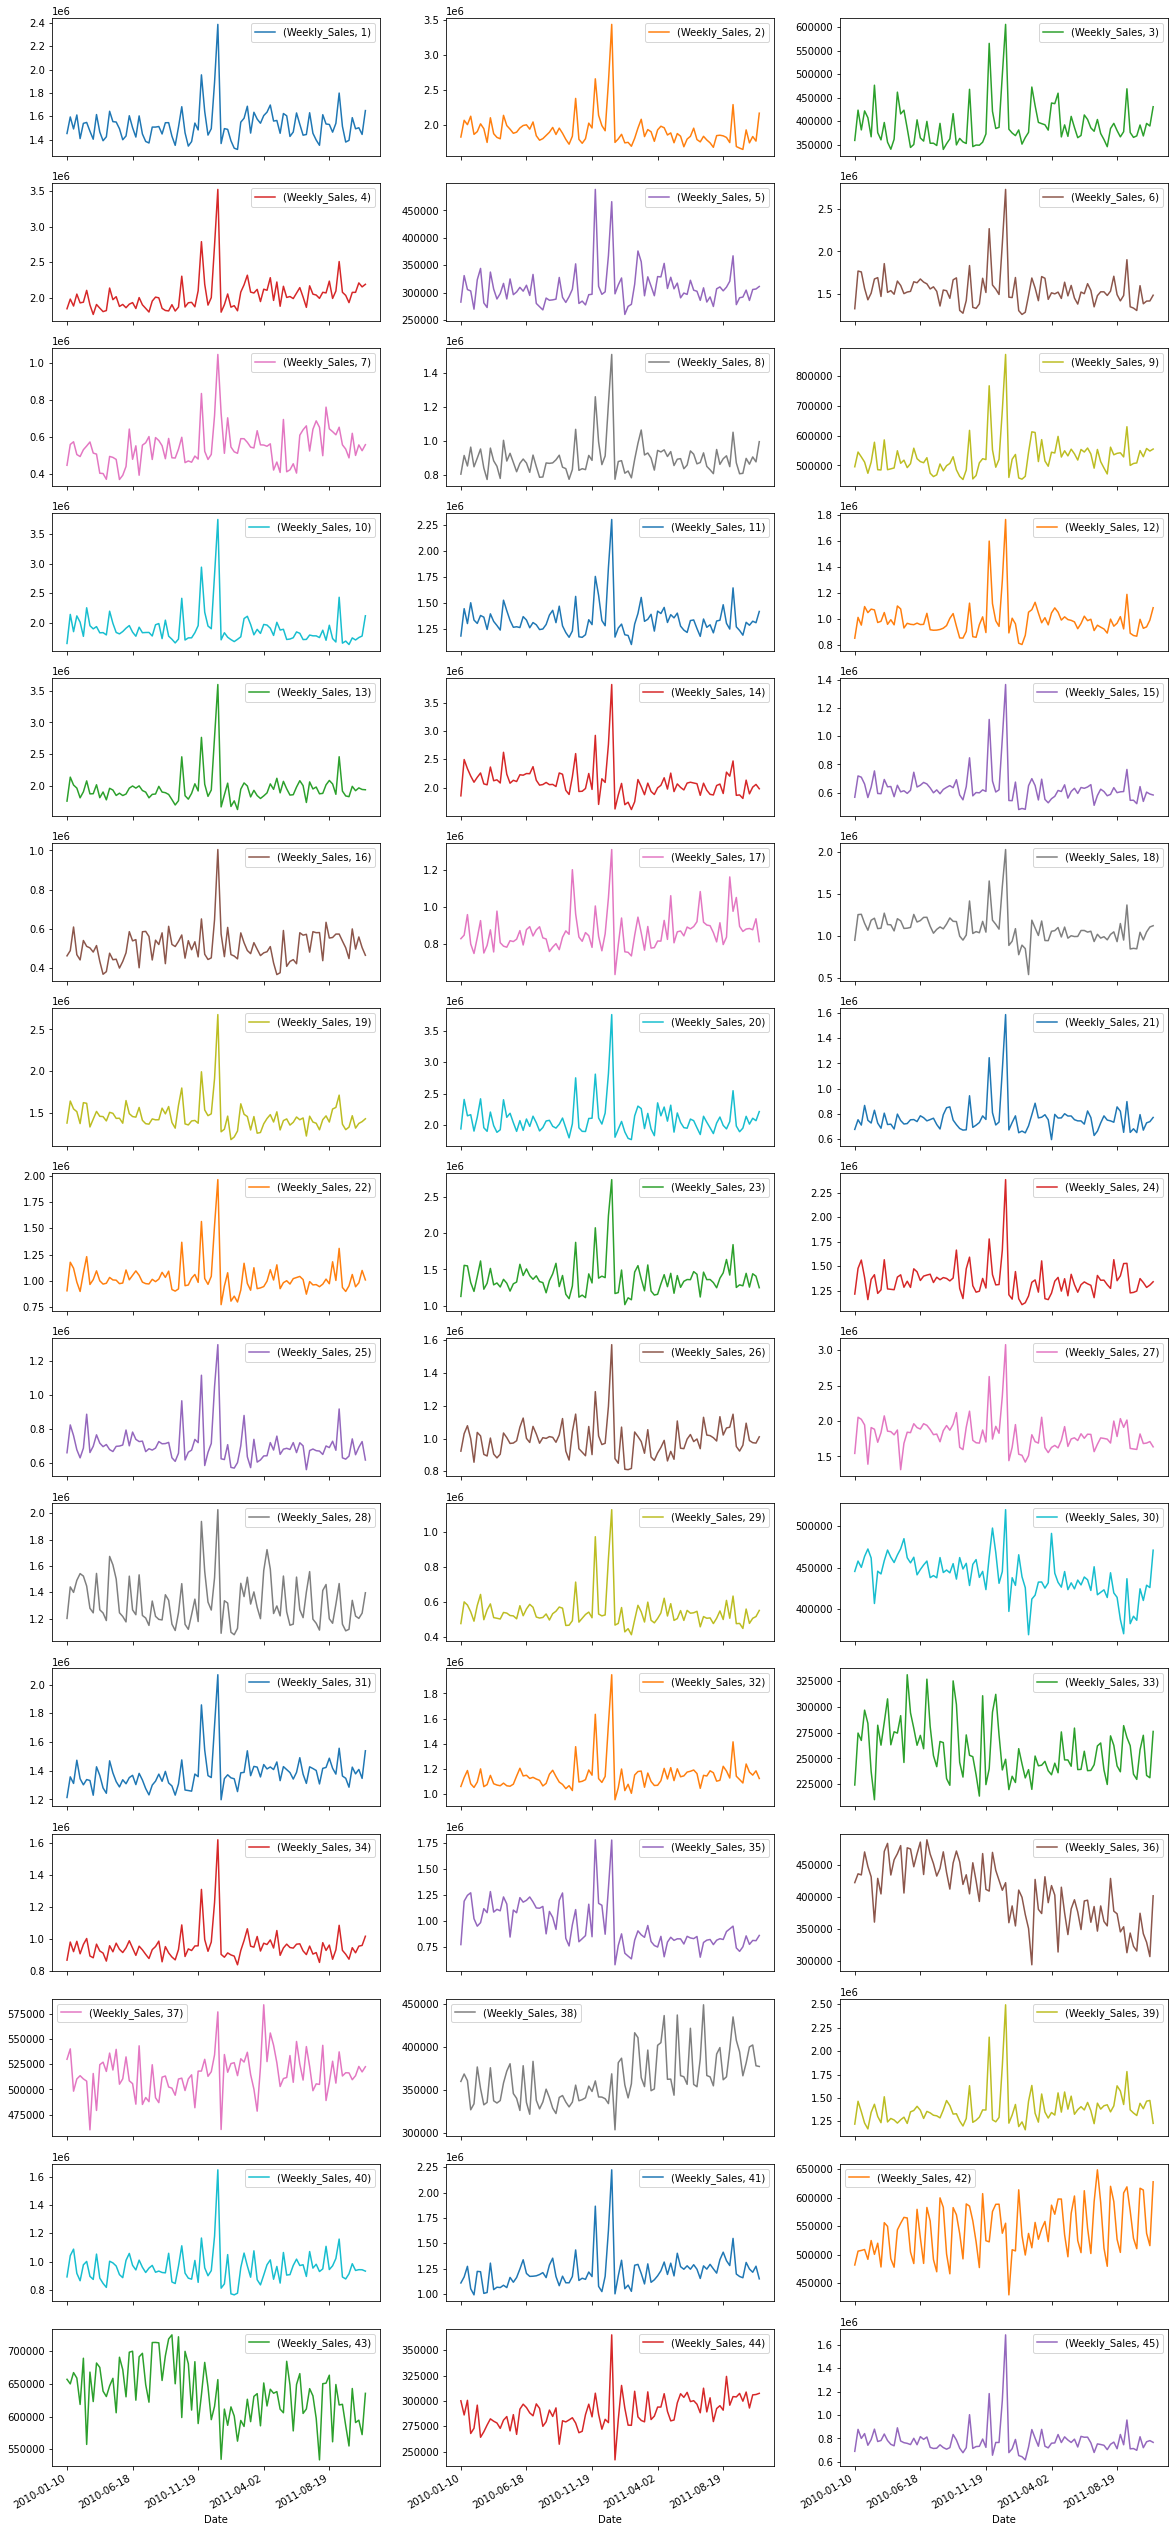

In [67]:
df4.unstack(level=0).plot(kind = 'line', subplots = True, figsize = (20, 50), layout = (15, 3), yticks=)
plt.show()

In [13]:
df2.loc[df2['Type'] == 'B']['Store'].unique()

array([ 3,  5,  7,  9, 10, 12, 15, 16, 17, 18, 21, 22, 23, 25, 29, 35, 45],
      dtype=int64)

In [14]:
df2.loc[df2['Type'] == 'A']['Store'].unique()

array([ 1,  2,  4,  6,  8, 11, 13, 14, 19, 20, 24, 26, 27, 28, 31, 32, 33,
       34, 36, 39, 40, 41], dtype=int64)

In [15]:
df2.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2011-11-03,21280.40,False,53.56,3.459,0.0,0.0,0.0,0.0,0.0,214.111056,7.742,A,151315
1,1,2,2011-11-03,48465.72,False,53.56,3.459,0.0,0.0,0.0,0.0,0.0,214.111056,7.742,A,151315
2,1,3,2011-11-03,10689.97,False,53.56,3.459,0.0,0.0,0.0,0.0,0.0,214.111056,7.742,A,151315
3,1,4,2011-11-03,35229.12,False,53.56,3.459,0.0,0.0,0.0,0.0,0.0,214.111056,7.742,A,151315
4,1,5,2011-11-03,23704.37,False,53.56,3.459,0.0,0.0,0.0,0.0,0.0,214.111056,7.742,A,151315


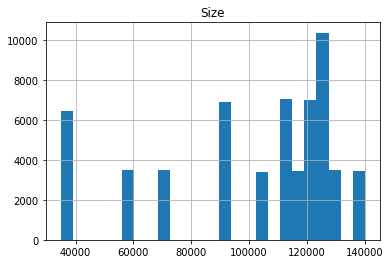

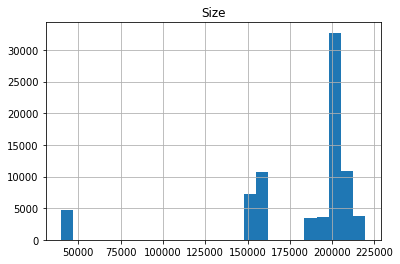

In [20]:
df2.loc[df2['Type'] == 'B'][['Size']].hist(bins=25)
df2.loc[df2['Type'] == 'A'][['Size']].hist(bins=25)
plt.show()

In [35]:
df5 = df4.reset_index()

In [59]:
type(list(df5.Store.unique()))

list